In [61]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [62]:
SIZE_COL = 26
SIZE_ROW = 26
NUM_OF_ITERATIONS = 20
matrix = np.random.randint(0, 2, size=(SIZE_ROW, SIZE_COL))

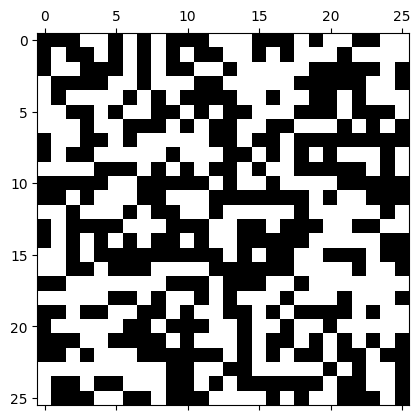

In [63]:
plt.matshow(matrix, cmap="gray")
plt.show()

In [64]:
def count_alive_neighbors(matrix,row, col):
    alive = 0
    if row > 0:
        alive += matrix[row-1][col]
        if col > 0:
            alive += matrix[row-1][col-1]
    if row < SIZE_ROW-1:
        alive += matrix[row+1][col]
        if col > SIZE_COL-1:
            alive += matrix[row+1][col+1]
    if col > 0:
        alive += matrix[row][col-1]
        if row < SIZE_ROW-1:
            alive+= matrix[row+1][col-1]
    if col < SIZE_COL-1:
        alive += matrix[row][col+1]
        if row > 0:
            alive+= matrix[row-1][col+1]
    return alive


def game_of_life(matrix):
    next_gen = np.zeros((SIZE_ROW, SIZE_COL))
    for row in range(SIZE_ROW):
        for col in range(SIZE_COL):
            cell = matrix[row][col]
            alive_neighbors = count_alive_neighbors(matrix,row,col)
            if cell and alive_neighbors > 1 and alive_neighbors < 4:
                next_gen[row][col] = 1
            if not cell and alive_neighbors == 3:
                next_gen[row][col] = 1
    return next_gen

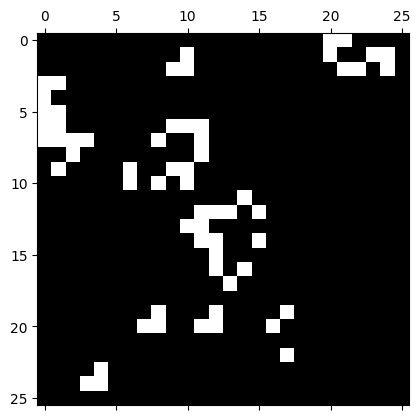

In [65]:
frames = [matrix]
for _ in range(NUM_OF_ITERATIONS):
    matrix = game_of_life(matrix)
    frames.append(matrix)
plt.matshow(matrix, cmap="gray")

images = [(frame*255).astype(np.uint8) for frame in frames]
imageio.mimsave("game_of_life.gif", images, fps=2)
